<a href="https://colab.research.google.com/github/MarianoMS56/Egyptian-Hieroglyphs-CNN-Model_Data-Mining-Project/blob/main/Data_Mining_Project_Egyptian_hieroglyphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files


Initially a .zip file is used since it is not possible to upload folders to colab

In [ ]:
# Function to extract zip files
def extract_zip(zip_path, extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

In [ ]:
# Upload the 'Train.zip' and 'Test.zip' files
uploaded_train = files.upload()
uploaded_test = files.upload()

Saving Test.zip to Test.zip


Saving Train.zip to Train.zip


In [ ]:
# Get the paths of the uploaded files
train_zip_path = '/content/Train.zip'
test_zip_path = '/content/Test.zip'

In [ ]:
# Set the paths to extract the data
train_extract_path = '/content/extracted/train_dataset'
test_extract_path = '/content/extracted/test_dataset'

extract_zip(train_zip_path, train_extract_path)
extract_zip(test_zip_path, test_extract_path)

#Image dimensions and number of classes that the model will use for the training
img_width, img_height = 64, 64
num_classes = 50

Starting CNN Model and training with the dataset

In [ ]:
#CNN model using Keras API
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

#Compile the model to optimizer the loss function and evaluation metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#configuration for training images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

#Configuration for testing images
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_extract_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_extract_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

#Train the model with the training datas
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Found 3890 images belonging to 1 classes.
Found 1052 images belonging to 1 classes.
Epoch 1/10
122/122 [==============================] - 38s 300ms/step - loss: 3334436.7500 - accuracy: 0.0000e+00 - val_loss: 16464427.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
122/122 [==============================] - 34s 282ms/step - loss: 73838888.0000 - accuracy: 0.0000e+00 - val_loss: 160217888.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
122/122 [==============================] - 34s 281ms/step - loss: 311544736.0000 - accuracy: 0.0000e+00 - val_loss: 497915104.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
122/122 [==============================] - 37s 304ms/step - loss: 727048896.0000 - accuracy: 0.0000e+00 - val_loss: 993398720.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
122/122 [==============================] - 37s 305ms/step - loss: 1275078656.0000 - accuracy: 0.0000e+00 - val_loss: 1585343744.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
122/122 [==============================] - 37s 307ms/step - lo

In [ ]:
# Preproccesing the test images for the predictions
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_extract_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode=None,  # No labels for test set
    shuffle=False  # Ensure the order is maintained for predictions
)

#Predict classes for the test dataset
predictions = model.predict(test_generator)

#Convert predictions to binary classes (0 or 1)
binary_predictions = np.round(predictions)

#Show the first 10 predictions
print("Predicciones:", binary_predictions[:10])

Found 1052 images belonging to 1 classes.
33/33 [==============================] - 3s 97ms/step
Predicciones: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

33/33 [==============================] - 6s 194ms/step


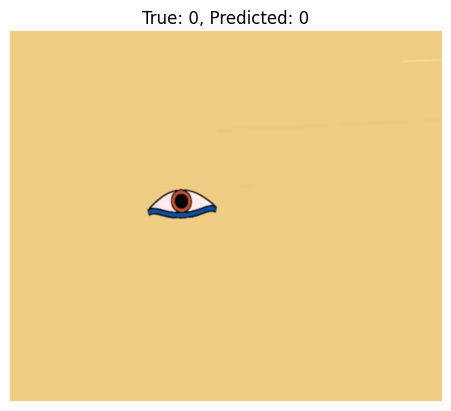

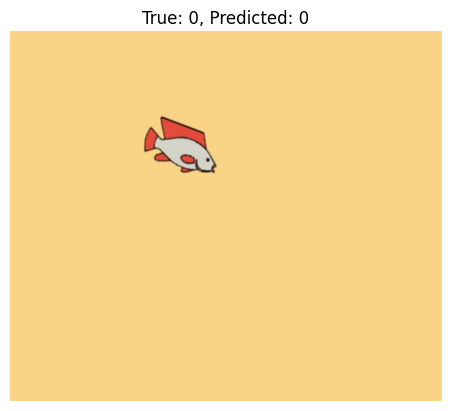

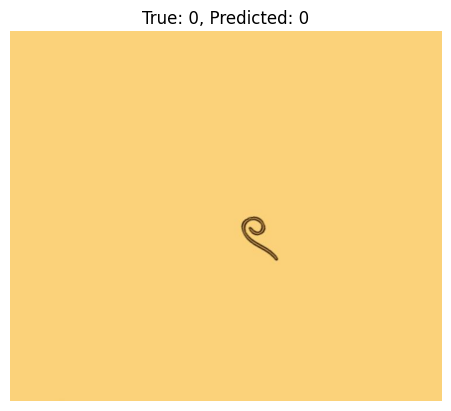

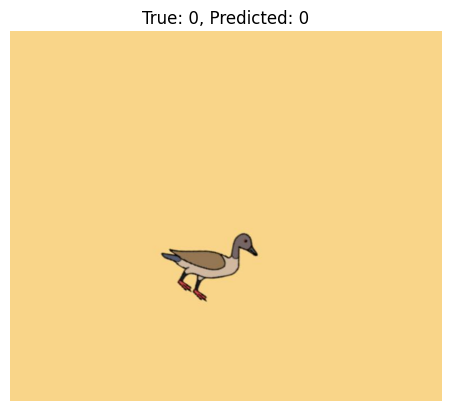

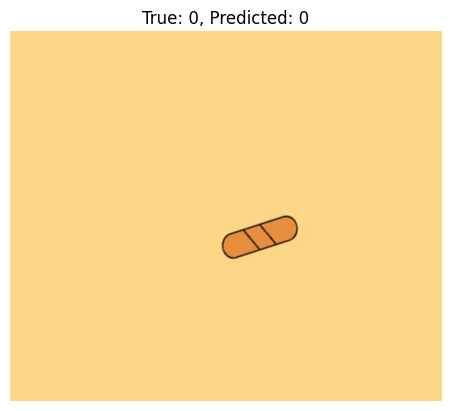

In [ ]:
# Predictions on the test set
predictions = model.predict(test_generator)

# Get class labels (0 or 1) based on predictions
predicted_labels = np.round(predictions).flatten()

# Get true labels
true_labels = test_generator.classes

# Get file paths of test images
file_paths = test_generator.filepaths

# Display some images with their predicted labels
num_images_to_display = 5

for i in range(num_images_to_display):
    # Randomly select an image
    random_index = np.random.randint(len(file_paths))

    # Get the image path, true label, and predicted label
    image_path = file_paths[random_index]
    true_label = true_labels[random_index]
    predicted_label = predicted_labels[random_index]

    # Load and display the image
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis('off')

    # Display true and predicted labels
    plt.title(f'True: {int(true_label)}, Predicted: {int(predicted_label)}')
    plt.show()

In [ ]:
#Use the trained model to make predictions on the test data
test_generator = test_datagen.flow_from_directory(
    test_extract_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',  #Binary classification
    shuffle=False  #Do not shuffle the data
)

#Predict the class probabilities for each image in the test set
predictions = model.predict(test_generator)

#Threshold the predictions to get the predicted classes (0 or 1)
predicted_classes = (predictions > 0.5).astype(np.int)

#Display the predicted classes for each image
for i, filename in enumerate(test_generator.filenames):
    print(f"{filename} - Predicted Class: {predicted_classes[i]}")

Found 1052 images belonging to 1 classes.
33/33 [==============================] - 4s 94ms/step
Test/1.jpeg - Predicted Class: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0]
Test/1.jpg - Predicted Class: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0]
Test/100 (42).jpg - Predicted Class: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0]
Test/100 (43).jpg - Predicted Class: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0]
Test/100 (44).jpg - Predicted Class: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0]
Test/100 (45).jpg - Predicted Class: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0]
Test/100 (46).jpg - Predicted Class: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

<ipython-input-50-03d852e2e448>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predicted_classes = (predictions > 0.5).astype(np.int)


Test/horn (45).jpg - Predicted Class: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0]
Test/horn (46).jpg - Predicted Class: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0]
Test/horn (47).jpg - Predicted Class: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0]
Test/horn (48).jpg - Predicted Class: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0]
Test/horn (49).jpg - Predicted Class: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0]
Test/horn (50).jpg - Predicted Class: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0]
Test/horn (51).jpg - Predicted Class: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0]
Test/horn (52

# **Notes**
The objective of the project was to be able to identify and mark hieroglyphs, however during the development of the training, different points were seen which prevented the correct follow-up of the training.

The first one is that due to the fact that this is the first CNN model that I have developed, my experience and knowledge is limited and I knew that the development of this project was very difficult and that it might not be possible to achieve it on time.

The second point is the dataset, this is one that has as objective a classificatory model, being a program that must be supervised, my objective is more focused to a semi supervised model so that the model itself could learn by itself, besides my idea was not to elaborate a classificatory model, only identification of the existence of an Egyptian hieroglyph, also the content of the dataset is not good for the model, since it has images whose properties are the same in all aspects except in 2, the name and the type of content that gives the image, this is bad for the model because when it is trained it will mark as a characteristic that the hieroglyphs are always in images of only one size, when it is tested with a larger or smaller image, its prediction will be mostly wrong.

El tercer punto es en su entrenamiento del modelo al haber tenido un dataset el cual no es para identificacion en general sino para clasificacion, se llega a tener un problema en el objetivo del proyecto y el del mismo dataset, el entrenamiento que se le quiso dar no fue el optimo para este mismo, lo que hizo que sus resultados fueran erroneos y su accuracy fuera muy malo para lo que se podria esperar, la razon de no haberse usado un dataset diferente es principalmente por los temas del tiempo que se tuvieron.